In [1]:
import tensorflow as tf 
from tensorflow.keras import layers, models, activations

In [2]:
import numpy as np 
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt

## Max Pooling

(1, 4, 4, 1)

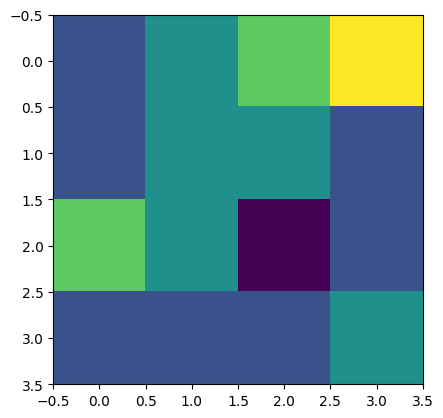

In [30]:
# contoh input matrix

input_matrix = np.array([
    [1, 2, 3, 4],
    [1, 2, 2, 1],
    [3, 2, 0, 1],
    [1, 1, 1, 2],
], dtype=float)

plt.imshow(input_matrix, vmin=0, vmax=4)

input_matrix = np.reshape(input_matrix, [1, 4, 4, 1])

input_matrix.shape

In [4]:
# maxpooling
maxPooling = layers.MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2)
)

In [31]:
result = maxPooling(input_matrix).numpy()
result

array([[[[2.],
         [4.]],

        [[3.],
         [2.]]]], dtype=float32)

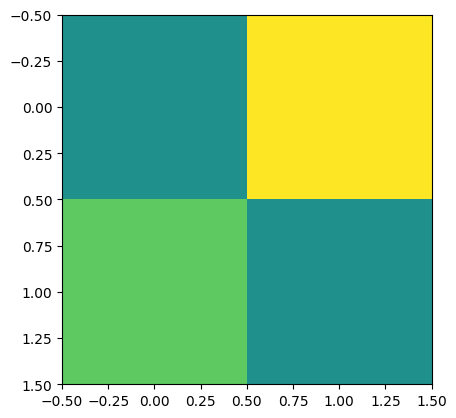

In [32]:
result = np.reshape(result, [2, 2])

plt.imshow(result, vmin=0, vmax=4)

## Convolution

(1, 216, 216, 1)

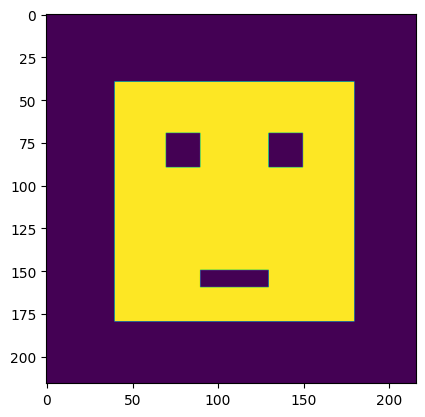

In [47]:
# contoh input matrix

# zeros matrix
input_matrix = np.zeros(shape=(216, 216))

input_matrix[40:180, 40:180] = 1  # Wajah kotak (head)

input_matrix[70:90, 70:90] = 0  # Mata kiri
input_matrix[70:90, 130:150] = 0  # Mata kanan

input_matrix[150:160, 90:130] = 0  # Mulut

plt.imshow(input_matrix, vmin=0, vmax=1)

input_matrix = np.reshape(input_matrix, [1, 216, 216, 1])

input_matrix.shape

In [48]:
# convocultion
conv = layers.Conv2D(
    filters=3,
    kernel_size=(4, 4),
    strides=(1, 1)
)

In [49]:
result = conv(input_matrix).numpy()

result.shape

(1, 213, 213, 3)

In [50]:
# kita ubah supaya lebih mudah dalam melakukan representasi hasil convolusinya
# perhatikan size 213, 213 harus sama dengan result.shape, sedangkan 3 harus sama seperti filter pada conv
result = np.reshape(result, [213, 213, 3])

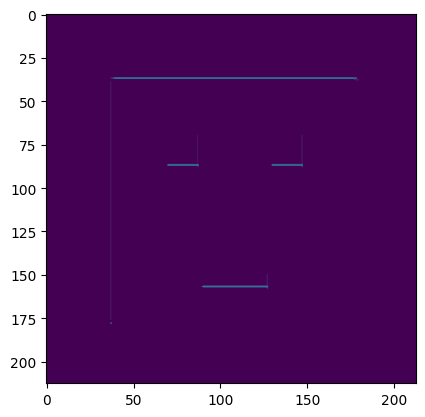

In [51]:
plt.imshow(result[:, :, 0], vmin=0, vmax=1)

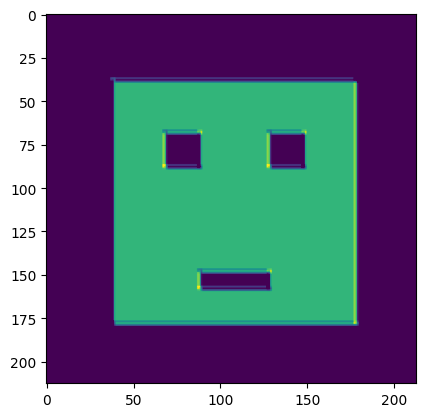

In [52]:
plt.imshow(result[:, :, 1], vmin=0, vmax=1)

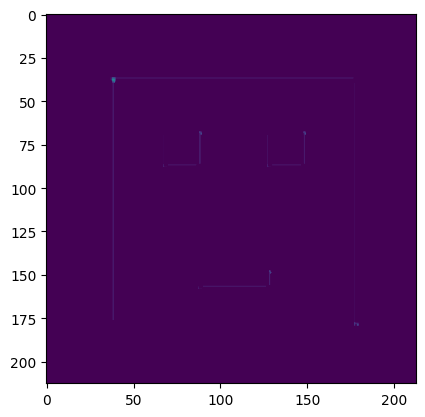

In [53]:
plt.imshow(result[:, :, 2], vmin=0, vmax=1)

## Activation Function

In [14]:
relu = activations.relu
linear = activations.linear
softmax = activations.softmax
sgd = activations.sigmoid
tanh = activations.tanh

In [15]:
input_array = np.array(
    [0.10, -0.10, 1, -1, 9, 0, 0.34],
    dtype=float
)

In [16]:
# relu

relu(input_array).numpy()

array([0.1 , 0.  , 1.  , 0.  , 9.  , 0.  , 0.34])

In [17]:
# linear

linear(input_array)

array([ 0.1 , -0.1 ,  1.  , -1.  ,  9.  ,  0.  ,  0.34])

In [18]:
# softmax

# ini akan menghasilkan error
# softmax(input_array)

# kalo di tensorflow.keras input dari softmax harus berupa tensor dan 2d
updated_input = tf.convert_to_tensor(np.reshape(input_array, [1, 7]))
softmax(updated_input).numpy()

array([[1.36262786e-04, 1.11562534e-04, 3.35152374e-04, 4.53579414e-05,
        9.99075145e-01, 1.23295668e-04, 1.73223952e-04]])

In [19]:
# sigmoid

sgd(input_array).numpy()

array([0.52497919, 0.47502081, 0.73105858, 0.26894142, 0.99987661,
       0.5       , 0.58419052])

In [20]:
# tanh

tanh(input_array).numpy()

array([ 0.09966799, -0.09966799,  0.76159416, -0.76159416,  0.99999997,
        0.        ,  0.32747739])

## Data Spliting

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# misal datanya kaya matrix ini dimana [x1, x2, x3, y]

data_matrix = np.array([
    [12, 21, 33, 0.1],
    [32, 34, 24, 0.2],
    [11, 22, 41, 0.3],
    [11, 5, 31, 0.4],
    [14, 2, 30, 0.5],
])

x = data_matrix[:, 0:-1]
y = data_matrix[:, 1].reshape(-1, 1)

In [23]:
x.shape, y.shape

((5, 3), (5, 1))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [25]:
x_train.shape, x_test.shape

((3, 3), (2, 3))

In [26]:
y_train.shape, y_test.shape

((3, 1), (2, 1))